# Prova 2 - C210

### Instruções
* Esta prova deve ser feita INDIVIDUALMENTE, sem acesso a outros alunos
* É permitido o acesso aos códigos disponibilizados no Github da disciplina: https://github.com/TiagoMPereira/C210_IA
* Para a realização da prova apenas altere este notebook
* Ao final, envie na tarefa criada no Teams apenas o notebook com as alterações. **Renomeie o arquivo com seu nome (exemplo TiagoPereira.ipynb) antes de enviar**.
* **As saídas das células serão utilizadas para a correção, portanto não limpe as saídas, se não será impossível corrigir sua prova**
* Preencha o campo a seguir com suas informações

#### Boa prova!!!

##### Nome: Fabio Luiz Fiorita Pontes
##### Curso: GEC
##### Matrícula: 1553

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## REDES NEURAIS
Abaixo estão os códigos das redes neurais estudadas. **Não é necessário alterá-los.** Apenas execute-os para conseguir solucionar as questões.

### Perceptron

In [2]:
class Perceptron:
    def __init__(self, lr, n_epochs):
        self.lr = lr 
        self.n_epochs = n_epochs
        
    def activation(self, value):
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        np.random.seed(42)
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            is_error = False
            epoch_errors = 0
            
            for xi, target in zip(x, d):
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
            
            print(f"EPOCH: {epoch} - Erros da época: {epoch_errors}")
            self.total_error.append(epoch_errors / len(x))
            epoch += 1
    
    def test(self, x):
        results = []
        for xi in x:
            predicted = self.predict(xi)
            predicted = self.activation(predicted)
            results.append(predicted)
            
        return results

### Adaline

In [3]:
class Adaline:
    
    def __init__(self, lr, e):
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        np.random.seed(42)
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        max_epochs = 10000
        
        while True:
            mse = 0
            for xi, target in  zip(x, d):
                predicted = self.predict(xi)
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = mse / len(x)
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            
            if abs(last_mse - mse) <= self.e or epoch == max_epochs:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
            
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

### Multilayer Perceptron - MLP (Perceptron de múltiplas camadas)

In [4]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        self.lr = lr
        self.e = e
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        return (target - predicted)

    def predict(self, input_data, weights):
        return np.dot(input_data, weights).reshape(1, -1)
    
    
    def train(self, x, d):
        np.random.seed(42)
        self.w1 = np.random.random((x.shape[1] + 1, self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        epoch = 0
        last_mse = np.inf
        self.bias = -1
        max_epochs = 10000
        
        while True:
            mse = 0
            for xi, target in zip(x, d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse += current_error ** 2
                delta3 = current_error * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)
                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)
                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)
                
            mse = mse / len(x)
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e or epoch == max_epochs:
                break
                
            last_mse = mse
            epoch += 1
            
    def test(self, x):
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(y3)
            
        return results

## QUESTÕES

### 1)   São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

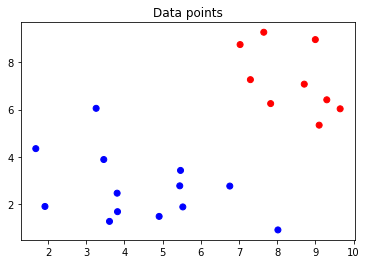

In [5]:
x = np.array([[9.3 , 6.41], [9.1 , 5.34], [7.3 , 7.26], [3.26, 6.05], [8.02, 0.92], [1.92, 1.91], [1.68, 4.35], 
              [3.82, 1.69], [8.71, 7.07], [3.46, 3.89], [5.53, 1.89], [3.61, 1.28], [9.65, 6.03], [5.47, 3.43], 
              [6.76, 2.77], [3.81, 2.47], [7.83, 6.25], [4.91, 1.49], [7.65, 9.26], [9.  , 8.95], [5.45, 2.78], 
              [7.03, 8.74]])

d = np.array([1, 1, 1, -1,  -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

**a) (10 pontos)** Crie duas redes neurais (1 Perceptron e 1 Adaline), defina os parâmetros delas como preferir, seguindo o quadro de restrições abaixo.

|Hiperparâmetro|Restrição|
|-|-|
|Taxa de aprendizado|Entre 0.005 e 0.1|
|Tolerância|Entre $10^{-7}$ e $10^{-6}$|
|Máximo de épocas|Entre 1000 e 10000|

Exemplo de criação de rede
```python
rede1 = MODELO_DA_REDE(parâmetros da rede)
rede2 = MODELO_DA_REDE(parâmetros da rede)
```

In [6]:
# REDE NEURAL 1
p = Perceptron(lr = 0.1, n_epochs = 5000)
# REDE NEURAL 2
a = Adaline(lr = 0.005, e = 1e-7)

**b) (12 pontos)** Treine as duas redes com os dados fornecidos anteriormente (x e d). 

In [7]:
# TREINAMENTO REDE 1
p.train(x = x, d = d)

EPOCH: 0 - Erros da época: -6
EPOCH: 1 - Erros da época: -4
EPOCH: 2 - Erros da época: -6
EPOCH: 3 - Erros da época: -6
EPOCH: 4 - Erros da época: -6
EPOCH: 5 - Erros da época: -4
EPOCH: 6 - Erros da época: -6
EPOCH: 7 - Erros da época: -4
EPOCH: 8 - Erros da época: -2
EPOCH: 9 - Erros da época: -2
EPOCH: 10 - Erros da época: 0


In [8]:
# TREINAMENTO REDE 2
a.train(x = x, d = d)

EPOCH: 0 - MSE: 4.194935345322308 - |mse_ant - mse|: inf
EPOCH: 1 - MSE: 0.8191559429467279 - |mse_ant - mse|: 3.3757794023755796
EPOCH: 2 - MSE: 0.6674323251140565 - |mse_ant - mse|: 0.1517236178326714
EPOCH: 3 - MSE: 0.5875645404212811 - |mse_ant - mse|: 0.07986778469277533
EPOCH: 4 - MSE: 0.5428392108415202 - |mse_ant - mse|: 0.04472532957976094
EPOCH: 5 - MSE: 0.515457975167701 - |mse_ant - mse|: 0.027381235673819226
EPOCH: 6 - MSE: 0.4967663217152491 - |mse_ant - mse|: 0.018691653452451884
EPOCH: 7 - MSE: 0.4825354737205998 - |mse_ant - mse|: 0.014230847994649298
EPOCH: 8 - MSE: 0.4706847438069778 - |mse_ant - mse|: 0.011850729913622016
EPOCH: 9 - MSE: 0.46018010758017813 - |mse_ant - mse|: 0.010504636226799646
EPOCH: 10 - MSE: 0.45050028340229903 - |mse_ant - mse|: 0.009679824177879104
EPOCH: 11 - MSE: 0.4413770388786624 - |mse_ant - mse|: 0.009123244523636609
EPOCH: 12 - MSE: 0.4326682884203315 - |mse_ant - mse|: 0.008708750458330916
EPOCH: 13 - MSE: 0.42429568356028463 - |mse_a

*São fornecidos os seguintes dados de teste*

In [9]:
x_teste = np.array([[2.29, 2.67], [5.28, 3.98], [2.49, 5.9 ], [2.82, 4.51], [6.68, 6.95], [6.05, 9.01], [8.8 , 6.09], 
                    [7.45, 6.78]])

d_teste = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

**c) (12 pontos)** Teste as duas redes enviando x_teste. Apresente o resultado do teste e verifique se o resultado de ambas é igual aos valores de d_teste [-1, -1, -1, -1, 1, 1, 1, 1]

In [10]:
def acuracia(real, predito):
    acertos = 0
    for i in range(len(real)):
        if real[i] == predito[i]:
            acertos+=1
    
    return acertos/len(real)

In [11]:
# TESTES DA REDE 1
# lembre-se de mostrar o resultado dos testes
teste_resultado_percepton = p.test(x_teste)
print(teste_resultado_percepton)
acuracia(d_teste, teste_resultado_percepton)

[-1, -1, -1, -1, 1, 1, 1, 1]


1.0

In [12]:
# TESTES DA REDE 2
# lembre-se de mostrar o resultado dos testes
teste_resultado_adaline = a.test(x_teste)
print(teste_resultado_adaline)
acuracia(d_teste, teste_resultado_adaline)

[-1, -1, -1, -1, 1, 1, 1, 1]


1.0

**d) (20 pontos)** Qual das redes treinou mais rápido? Qual obteve mais resultados iguais aos esperados?

A rede percepton treinou mais rápido com 10 épocas, comparando com 554 épocas da rede adaline.
As duas redes obtiveram o mesmo resultado, acertando todos os dados de teste.

### 2) São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

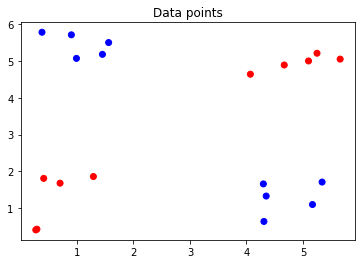

In [13]:
x = np.array([[0.27, 0.41],[0.41, 1.81],[1.29, 1.86],[0.29, 0.43],[0.7 , 1.68],
              [5.66, 5.05],[5.25, 5.21],[4.07, 4.64],[4.67, 4.89],[5.1 , 5.  ],
              [1.45, 5.18],[0.99, 5.07],[0.38, 5.78],[0.9 , 5.71],[1.56, 5.5 ],
              [5.17, 1.1 ],[4.3 , 1.66],[5.34, 1.71],[4.31, 0.64],[4.35, 1.33]])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

 **a) (10 pontos)** Treine uma rede MLP com:
 * taxa de aprendizado: 0.7
 * tolerância: 1e-6
 * neurônios por camada: camada escondida 1 = 4, camada escondida 2 = 3, camada de saída = 1

In [14]:
# CRIAR REDE 3
rede = MLP(lr = 0.7, e = 1e-6, neurons = [4, 3, 1])
# TREINAR A REDE
rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.2593792]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.2384633]] - |mse_ant - mse|: [[0.0209159]]
EPOCH: 2 - MSE: [[0.25014138]] - |mse_ant - mse|: [[0.01167808]]
EPOCH: 3 - MSE: [[0.255114]] - |mse_ant - mse|: [[0.00497262]]
EPOCH: 4 - MSE: [[0.25657555]] - |mse_ant - mse|: [[0.00146155]]
EPOCH: 5 - MSE: [[0.25694597]] - |mse_ant - mse|: [[0.00037042]]
EPOCH: 6 - MSE: [[0.25701147]] - |mse_ant - mse|: [[6.55002535e-05]]
EPOCH: 7 - MSE: [[0.25699716]] - |mse_ant - mse|: [[1.43154216e-05]]
EPOCH: 8 - MSE: [[0.25696414]] - |mse_ant - mse|: [[3.30182075e-05]]
EPOCH: 9 - MSE: [[0.25692816]] - |mse_ant - mse|: [[3.59788215e-05]]
EPOCH: 10 - MSE: [[0.25689285]] - |mse_ant - mse|: [[3.53100571e-05]]
EPOCH: 11 - MSE: [[0.25685875]] - |mse_ant - mse|: [[3.41015141e-05]]
EPOCH: 12 - MSE: [[0.25682569]] - |mse_ant - mse|: [[3.30630322e-05]]
EPOCH: 13 - MSE: [[0.25679338]] - |mse_ant - mse|: [[3.23055416e-05]]
EPOCH: 14 - MSE: [[0.25676157]] - |mse_ant - mse|: [[3.18071099e-0

**b) (16 pontos)** Crie uma nova rede MLP com *taxa de aprendizado* e *tolerância* iguais aos da rede anterior.  
A quantidade de neurônios por camada deve seguir a seguinte regra:  
* Camada escondida 1 -> Maior dígito da sua matrícula (caso o maior dígito seja 1 utilize 2 neurônios)
* Camada escondida 2 -> Menor dígito da sua matrícula (caso o menor dígito seja 0 ou 1 utilize 2 neurônios)
* Camada de saída -> 1 neurônio  
 **Exemplo** : Matrícula **1599**  
Camada escondida 1 -> 9 neurônios  
Camada escondida 2 -> 2 neurônios (menor dígito é 1)  
Camada de saída -> 1 neurônio  

Treine a rede criada

In [15]:
# Criar a rede
# Matricula 1553
rede = MLP(lr = 0.7, e = 1e-6, neurons = [5, 2, 1])
# Treinar a rede
rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.25490348]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.24271077]] - |mse_ant - mse|: [[0.0121927]]
EPOCH: 2 - MSE: [[0.25050133]] - |mse_ant - mse|: [[0.00779056]]
EPOCH: 3 - MSE: [[0.25475341]] - |mse_ant - mse|: [[0.00425207]]
EPOCH: 4 - MSE: [[0.25639514]] - |mse_ant - mse|: [[0.00164173]]
EPOCH: 5 - MSE: [[0.2569914]] - |mse_ant - mse|: [[0.00059626]]
EPOCH: 6 - MSE: [[0.25721196]] - |mse_ant - mse|: [[0.00022056]]
EPOCH: 7 - MSE: [[0.25730147]] - |mse_ant - mse|: [[8.95143397e-05]]
EPOCH: 8 - MSE: [[0.25734516]] - |mse_ant - mse|: [[4.36834808e-05]]
EPOCH: 9 - MSE: [[0.25737208]] - |mse_ant - mse|: [[2.69263292e-05]]
EPOCH: 10 - MSE: [[0.25739207]] - |mse_ant - mse|: [[1.99841495e-05]]
EPOCH: 11 - MSE: [[0.25740841]] - |mse_ant - mse|: [[1.63469865e-05]]
EPOCH: 12 - MSE: [[0.25742225]] - |mse_ant - mse|: [[1.38368817e-05]]
EPOCH: 13 - MSE: [[0.25743398]] - |mse_ant - mse|: [[1.17296983e-05]]
EPOCH: 14 - MSE: [[0.25744376]] - |mse_ant - mse|: [[9.78368547e-06

**c) (20 pontos)** Qual das duas redes MLP foi melhor no treinamento? Justifique citando a quantidade de épocas de treinamento e o erro final (mse)

A primeira rede foi melhor no treinamento, pois obteve um mse menor de 0.00029187 em comparação com um mse de 0.25746528 da segunda rede, mas isso aconteceu após 455 épocas em comparação a 19 épocas da segunda rede.